In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import graphviz 
import seaborn as sns

In [5]:
ds = datasets.load_iris(as_frame= True)
ds.keys()
df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= ds['feature_names'] + ['target'])
df['class'] = pd.Categorical.from_codes(ds.target, ds.target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [6]:
y = np.array(df['target'])
x = np.array(df.drop(columns=['target', 'class']))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Selected criterion is gini, selected max_depth is: 1
Selected criterion is gini, selected max_depth is: 2
Selected criterion is gini, selected max_depth is: 3
Selected criterion is gini, selected max_depth is: 4
Selected criterion is gini, selected max_depth is: 5
Selected criterion is gini, selected max_depth is: 6
Selected criterion is gini, selected max_depth is: 7
Selected criterion is gini, selected max_depth is: 8
Selected criterion is gini, selected max_depth is: 9
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


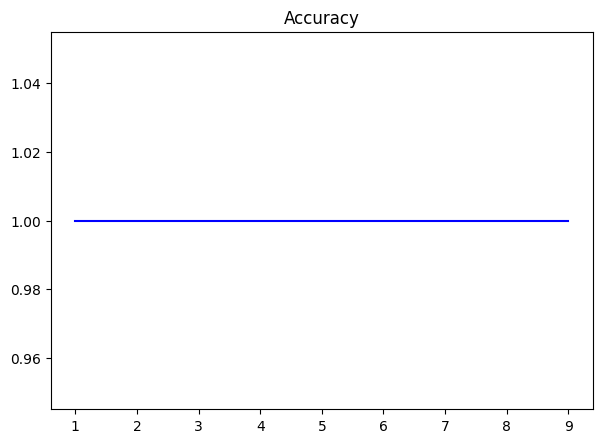

Selected criterion is entropy, selected max_depth is: 1
Selected criterion is entropy, selected max_depth is: 2
Selected criterion is entropy, selected max_depth is: 3
Selected criterion is entropy, selected max_depth is: 4
Selected criterion is entropy, selected max_depth is: 5
Selected criterion is entropy, selected max_depth is: 6
Selected criterion is entropy, selected max_depth is: 7
Selected criterion is entropy, selected max_depth is: 8
Selected criterion is entropy, selected max_depth is: 9
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


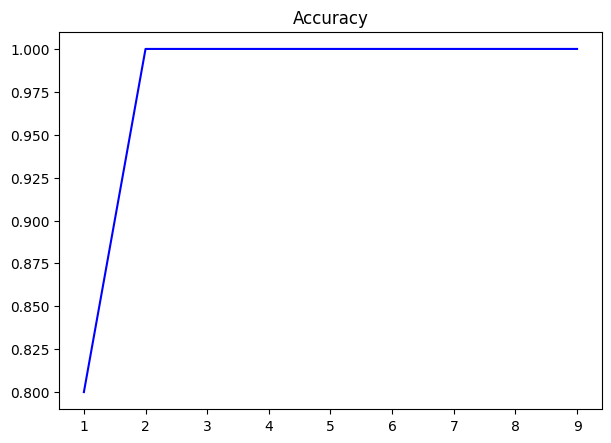

In [14]:
criterion = ['gini', 'entropy']

for i in criterion:
    accuracy= []
    for j in range(1,10):
        clf = RandomForestClassifier(random_state=0, criterion=i, max_depth=j)
        clf.fit(X_train, y_train)   # X_train, X_test, y_train, y_test
        y_pred = clf.predict(X_test)
        #depth = clf.get_depth()
        accuracy.append(accuracy_score(y_pred, y_test))
        print(f'Selected criterion is {i}, selected max_depth is: {j}')
        #print('The depth of the decision tree is: ', clf.get_depth())
        #print(confusion_matrix(y_test, y_hat))
        #print(f'The accuracy of the model with max depth = {depth} is: {accuracy_score(y_pred, y_test)} \n')
    sns.lineplot(range(1, 10), accuracy,color='blue')
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
    plt.title('Accuracy')
    plt.show();

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=146f2f95-10e2-4546-b8bb-7deb558f2ad8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>